In [1]:
# Imports
import json
import os
import shutil

In [2]:
# Mount the drive to get the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Function to convert the annotations into separete txt files
def convert_annotations(json_file, output_dir):
    with open(json_file, 'r') as f:
        data = json.load(f)

    for item in data['annotations']:
        image_id = item['image_id']
        bbox = item['bbox']
        class_id = item['category_id']

        # Convert bbox to YOLO format (center_x, center_y, width, height)
        x, y, w, h = bbox
        center_x = x + w / 2
        center_y = y + h / 2
        yolo_bbox = f"{class_id} {center_x/640} {center_y/640} {w/640} {h/640}\n"

        # Save YOLO annotation to a text file
        txt_file = os.path.join(output_dir, f"{image_id}.txt")
        with open(txt_file, 'a') as f:
            f.write(yolo_bbox)

In [4]:
# Create train labels directories if they don't exist
!mkdir -p /content/drive/MyDrive/WeedDetectionDataset/train/labels
!mkdir -p /content/drive/MyDrive/WeedDetectionDataset/test/labels

# Convert train annotations
convert_annotations('/content/drive/MyDrive/WeedDetectionDataset/train/_annotations.coco.json', '/content/drive/MyDrive/WeedDetectionDataset/train/labels')

# Convert test annotations
convert_annotations('/content/drive/MyDrive/WeedDetectionDataset/test/_annotations.coco.json', '/content/drive/MyDrive/WeedDetectionDataset/test/labels')

In [5]:
# Function to relocate and rename all images into an image file with their ids
def move_and_rename(annotation_file, train_folder, train_images_folder):

  # Load the annotation JSON file
  with open(annotation_file, 'r') as file:
      annotations = json.load(file)

  # Create a dictionary to map image filenames to their corresponding IDs
  image_id_map = {}
  for image_info in annotations['images']:
      image_id_map[image_info['file_name']] = image_info['id']

  # Move and rename the image files based on their IDs
  for filename in os.listdir(train_folder):
      if filename in image_id_map:
          image_id = image_id_map[filename]
          extension = os.path.splitext(filename)[1]  # Get the file extension
          new_filename = f"{image_id}{extension}"

          src_path = os.path.join(train_folder, filename)
          dst_path = os.path.join(train_images_folder, new_filename)
          shutil.move(src_path, dst_path)

          print(f"Moved and renamed: {filename} -> {new_filename}")

In [6]:

# Path to the train annotation JSON file
train_annotation_file = '/content/drive/MyDrive/WeedDetectionDataset/train/_annotations.coco.json'

# Path to the 'train' folder
train_folder = '/content/drive/MyDrive/WeedDetectionDataset/train'

# Path to the 'images' folder inside the 'train' folder
train_images_folder = '/content/drive/MyDrive/WeedDetectionDataset/train/images'

# Create the 'images' folder inside the 'train' folder
os.makedirs(train_images_folder, exist_ok=True)

# Move all train images and rename them by their ids
move_and_rename(train_annotation_file, train_folder, train_images_folder)

Moved and renamed: Rumex-obtusifolius-L_2313_jpg.rf.812bafd85664157c058dd93c9e6a117e.jpg -> 850.jpg
Moved and renamed: Rumex-obtusifolius-L_2312_jpg.rf.019423a89c690652c5a87cc719820dfb.jpg -> 16.jpg
Moved and renamed: Rumex-obtusifolius-L_2295_jpg.rf.701d679df761ca7e3324502261c07c2f.jpg -> 727.jpg
Moved and renamed: Rumex-obtusifolius-L_2106_jpg.rf.e691f970a58b5647656f818e2957707b.jpg -> 1474.jpg
Moved and renamed: Rumex-obtusifolius-L_2420_jpg.rf.d1de4ebc89d7da7591972035451790d5.jpg -> 1334.jpg
Moved and renamed: Rumex-obtusifolius-L_2145_jpg.rf.2b16e636a65d0d23867ac98f572f9ab2.jpg -> 294.jpg
Moved and renamed: Rumex-obtusifolius-L_2471_jpg.rf.f67f2572d919a3df82b37da3680ae8ad.jpg -> 1590.jpg
Moved and renamed: Rumex-obtusifolius-L_2394_jpg.rf.03d6c17f61d836dbabce05e17f2287ea.jpg -> 29.jpg
Moved and renamed: Rumex-obtusifolius-L_2302_jpg.rf.6956c4046d3a73495329b1c06ad6a3d3.jpg -> 674.jpg
Moved and renamed: Rumex-obtusifolius-L_2338_jpg.rf.399d0f4a2addd21e3bc0323054b99dbb.jpg -> 377.jpg

In [7]:
# Path to the test annotation JSON file
test_annotation_file = '/content/drive/MyDrive/WeedDetectionDataset/test/_annotations.coco.json'

# Path to the 'test' folder
test_folder = '/content/drive/MyDrive/WeedDetectionDataset/test'

# Path to the 'images' folder inside the 'test' folder
test_images_folder = '/content/drive/MyDrive/WeedDetectionDataset/test/images'

# Create the 'images' folder inside the 'test' folder
os.makedirs(test_images_folder, exist_ok=True)

# Move all test images and rename them by their ids
move_and_rename(test_annotation_file, test_folder, test_images_folder)

Moved and renamed: ridderzuring_3144_jpg.rf.5b86828a9ba817d48a2a531cb51a54e7.jpg -> 82.jpg
Moved and renamed: ridderzuring_3134_jpg.rf.33c8c3b64b84bc37707d1ae492358041.jpg -> 33.jpg
Moved and renamed: ridderzuring_3123_jpg.rf.dec89676b33f976690aabf25128a32ae.jpg -> 210.jpg
Moved and renamed: ridderzuring_3151_jpg.rf.175e23691b2ce606f3054d24896fd639.jpg -> 13.jpg
Moved and renamed: ridderzuring_3146_jpg.rf.f18ab57b06c488e3c4bed9ee2020ac31.jpg -> 236.jpg
Moved and renamed: ridderzuring_3145_jpg.rf.d851631c13eca87973d09b097faec321.jpg -> 205.jpg
Moved and renamed: ridderzuring_3140_jpg.rf.1bb92c730b1b7f7053fae4c7b38de457.jpg -> 15.jpg
Moved and renamed: ridderzuring_3132_jpg.rf.3e9ea76cf7c71c600deb988d67eac2ad.jpg -> 65.jpg
Moved and renamed: ridderzuring_3137_jpg.rf.45eb60ce06dae131686009b7d33066e5.jpg -> 62.jpg
Moved and renamed: ridderzuring_3126_jpg.rf.8980b3ae3ec4ecd023aab5bc54c26089.jpg -> 120.jpg
Moved and renamed: ridderzuring_3133_jpg.rf.5c8cd3580345823bfdc4fea6b7c4a55b.jpg -> 10

In [8]:
# Yaml file structure
yaml_content = '''
train: /content/drive/MyDrive/WeedDetectionDataset/train/images
val: /content/drive/MyDrive/WeedDetectionDataset/test/images

nc: 2
names: ['0 ridderzuring','grass-weeds']

train_label: /content/drive/MyDrive/WeedDetectionDataset/train/labels
val_label: /content/drive/MyDrive/WeedDetectionDataset/test/labels
'''

# Create the yaml file
with open('dataset.yaml', 'w') as file:
    file.write(yaml_content)

In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [10]:
# Pip install method (recommended)
!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [11]:
# Import YOLO
from ultralytics import YOLO

In [12]:
# Import YOLO version
model = YOLO('yolov8n.yaml')

In [13]:
# Train the model
model.train(data = 'dataset.yaml', verbose=True, epochs=50)

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 34.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 170MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/WeedDetectionDataset/train/labels... 1655 images, 6 backgrounds, 0 corrupt: 100%|██████████| 1661/1661 [00:54<00:00, 30.31it/s] 


train: New cache created: /content/drive/MyDrive/WeedDetectionDataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/WeedDetectionDataset/test/labels... 244 images, 1 backgrounds, 0 corrupt: 100%|██████████| 245/245 [00:09<00:00, 25.70it/s] 


val: New cache created: /content/drive/MyDrive/WeedDetectionDataset/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.62G      3.283      3.608      3.791         40        640: 100%|██████████| 104/104 [01:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        245        662    0.00319      0.144     0.0019   0.000537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.29G       2.47      2.198      2.641         42        640: 100%|██████████| 104/104 [00:55<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        245        662      0.496      0.553      0.462      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.28G      2.187      1.751      2.308         36        640: 100%|██████████| 104/104 [00:51<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        245        662      0.649      0.566      0.594      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.28G       2.07        1.6       2.19         42        640: 100%|██████████| 104/104 [00:50<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        245        662      0.753      0.594      0.642       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.26G      2.057      1.502      2.136         32        640: 100%|██████████| 104/104 [00:51<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]

                   all        245        662      0.702      0.591      0.628      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G      2.009      1.432       2.08         34        640: 100%|██████████| 104/104 [00:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        245        662      0.569      0.624      0.536      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G      1.967      1.415      2.027         38        640: 100%|██████████| 104/104 [00:53<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        245        662      0.653      0.585      0.615      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G       1.95      1.399      1.989         61        640: 100%|██████████| 104/104 [00:52<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        245        662      0.687      0.624      0.647      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.28G      1.919       1.36      1.961         52        640: 100%|██████████| 104/104 [00:49<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        245        662      0.505      0.628      0.433      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.28G      1.908      1.314       1.95         67        640: 100%|██████████| 104/104 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.35it/s]

                   all        245        662      0.643      0.666      0.648      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.28G      1.917      1.312      1.933         70        640: 100%|██████████| 104/104 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        245        662       0.65      0.656      0.628      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G      1.892      1.293      1.926         72        640: 100%|██████████| 104/104 [00:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        245        662      0.641      0.596      0.579      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.26G      1.905      1.318      1.937         41        640: 100%|██████████| 104/104 [00:50<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        245        662      0.689      0.669      0.691      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.28G      1.901      1.278      1.915         46        640: 100%|██████████| 104/104 [00:50<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        245        662      0.705      0.659      0.675      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.28G      1.874      1.291      1.901         37        640: 100%|██████████| 104/104 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        245        662       0.71      0.608      0.668      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.28G      1.876      1.281      1.889         59        640: 100%|██████████| 104/104 [00:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        245        662      0.687      0.686      0.714      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.28G      1.851      1.288      1.865         35        640: 100%|██████████| 104/104 [00:50<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        245        662      0.713       0.68      0.692      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.28G      1.846      1.258      1.856         47        640: 100%|██████████| 104/104 [00:49<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        245        662      0.682      0.642      0.661        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.28G       1.86      1.251      1.873         50        640: 100%|██████████| 104/104 [00:51<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        245        662      0.742      0.639      0.697      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.26G      1.829      1.233      1.846         46        640: 100%|██████████| 104/104 [00:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        245        662      0.696      0.615      0.652      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.28G      1.834      1.228      1.849         49        640: 100%|██████████| 104/104 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        245        662      0.739      0.662      0.696      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.26G      1.832      1.212      1.846         41        640: 100%|██████████| 104/104 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]

                   all        245        662      0.683      0.686      0.678      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.26G      1.795      1.209      1.831         50        640: 100%|██████████| 104/104 [00:52<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        245        662      0.733      0.677      0.685      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.28G      1.805      1.184       1.82         45        640: 100%|██████████| 104/104 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        245        662      0.696      0.677      0.694      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.28G      1.798      1.194      1.829         47        640: 100%|██████████| 104/104 [00:50<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        245        662      0.675      0.619      0.633      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.28G      1.779      1.182      1.806         39        640: 100%|██████████| 104/104 [00:50<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        245        662      0.747      0.662       0.72      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.28G      1.781      1.192        1.8         45        640: 100%|██████████| 104/104 [00:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]


                   all        245        662      0.729      0.651      0.703      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.29G       1.76       1.16      1.794         44        640: 100%|██████████| 104/104 [00:54<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]


                   all        245        662      0.695      0.622      0.646      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.26G      1.758      1.162      1.794         35        640: 100%|██████████| 104/104 [00:50<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        245        662      0.719      0.671       0.72      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.26G      1.749      1.154      1.784         39        640: 100%|██████████| 104/104 [00:49<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        245        662      0.708       0.68      0.697      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.28G       1.74      1.162       1.78         66        640: 100%|██████████| 104/104 [00:48<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        245        662      0.709      0.684      0.725      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.28G      1.728      1.151      1.774         39        640: 100%|██████████| 104/104 [00:52<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        245        662      0.709      0.695      0.715      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.28G      1.727      1.127      1.768         47        640: 100%|██████████| 104/104 [00:53<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        245        662      0.697      0.648       0.68      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.28G      1.735      1.151      1.769         43        640: 100%|██████████| 104/104 [00:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        245        662      0.728       0.65      0.698      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.28G      1.724      1.128      1.764         54        640: 100%|██████████| 104/104 [00:49<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        245        662      0.734       0.69      0.737       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.26G       1.72      1.122      1.761         47        640: 100%|██████████| 104/104 [00:50<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        245        662      0.721      0.672      0.721      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.28G       1.73      1.106      1.765         35        640: 100%|██████████| 104/104 [00:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        245        662      0.739      0.674      0.712      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.28G      1.725      1.118      1.754         34        640: 100%|██████████| 104/104 [00:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all        245        662      0.728      0.684      0.726      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.28G      1.699      1.109      1.752         48        640: 100%|██████████| 104/104 [00:52<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        245        662      0.721      0.671      0.705      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.26G      1.708      1.083       1.74         44        640: 100%|██████████| 104/104 [00:51<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        245        662       0.73      0.669      0.713      0.315


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.4G      1.616      1.051      1.724         33        640: 100%|██████████| 104/104 [00:51<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        245        662      0.724      0.686      0.722       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.24G      1.619      1.032      1.729         35        640: 100%|██████████| 104/104 [00:47<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        245        662      0.723      0.684      0.724      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.26G      1.604      1.053      1.713         37        640: 100%|██████████| 104/104 [00:51<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.33it/s]

                   all        245        662      0.752      0.662      0.719      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.26G      1.602      1.036      1.721         28        640: 100%|██████████| 104/104 [00:48<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        245        662      0.734      0.654       0.72      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.26G      1.581      1.021      1.708         36        640: 100%|██████████| 104/104 [00:46<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all        245        662      0.757      0.669      0.735      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.24G      1.585      1.013      1.705         33        640: 100%|██████████| 104/104 [00:50<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        245        662      0.715      0.704      0.722      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G      1.571     0.9991      1.703         20        640: 100%|██████████| 104/104 [00:48<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        245        662      0.762      0.677      0.732      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.29G      1.568     0.9991      1.692         25        640: 100%|██████████| 104/104 [00:47<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

                   all        245        662      0.739      0.688      0.725       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.25G      1.567     0.9822       1.69         34        640: 100%|██████████| 104/104 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

                   all        245        662      0.746      0.671      0.723      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.28G      1.573     0.9878      1.692         27        640: 100%|██████████| 104/104 [00:49<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        245        662      0.752      0.678      0.733      0.354



50 epochs completed in 0.812 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]


                   all        245        662      0.756      0.669      0.735      0.364
           grass-weeds        245        662      0.756      0.669      0.735      0.364
Speed: 0.6ms preprocess, 3.3ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7986b313c6a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Results

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

### Predicted labels on images

Predicted labels and boxes on batch0

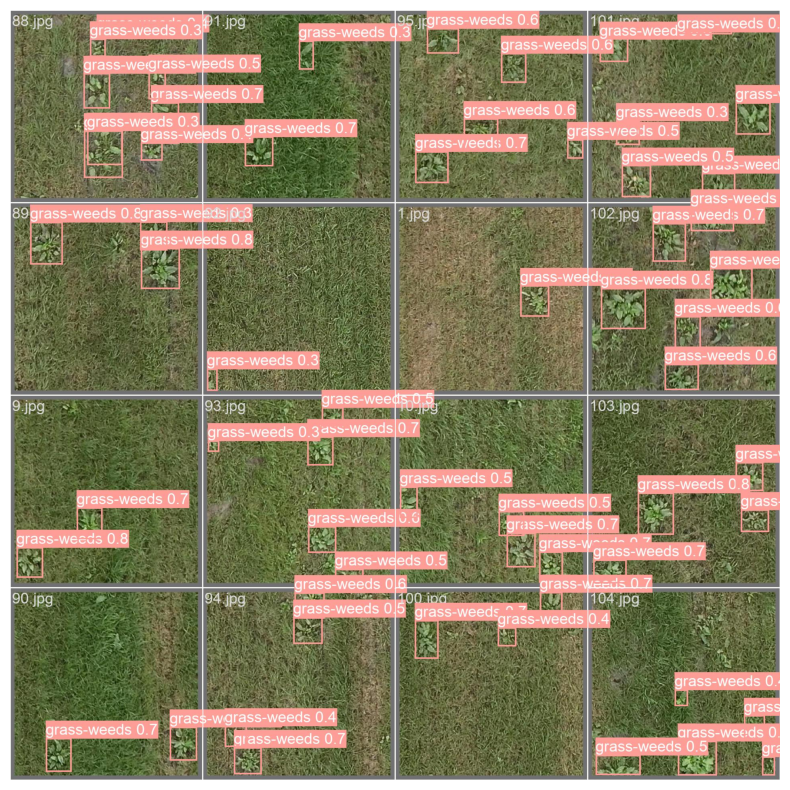

In [17]:
img = Image.open('/content/runs/detect/train/val_batch0_pred.jpg')
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

True labels and boxes on batch0

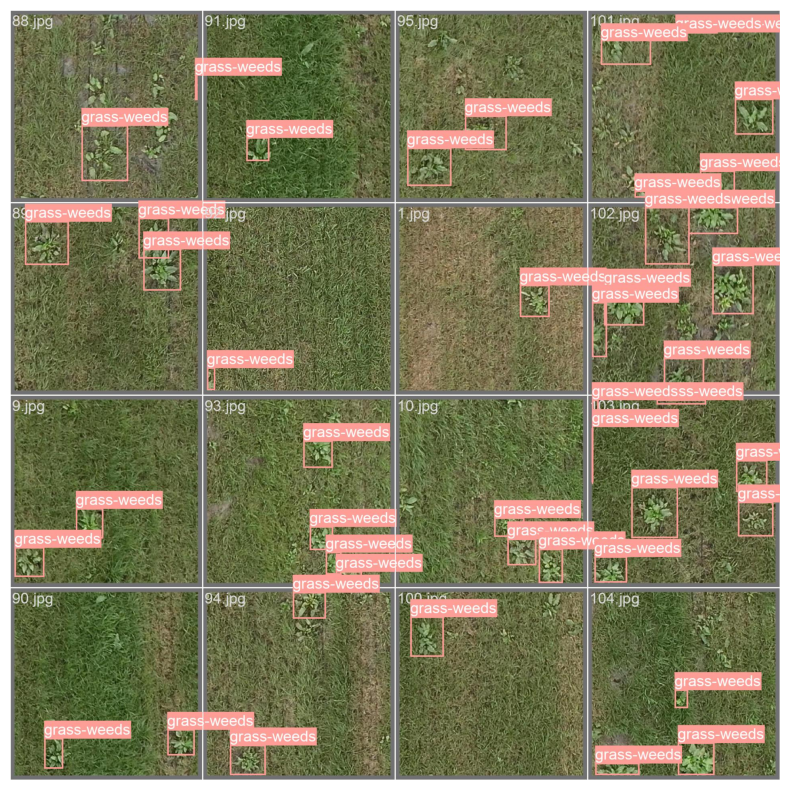

In [19]:
img = Image.open('/content/runs/detect/train/val_batch0_labels.jpg')
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

### Results and Metrics

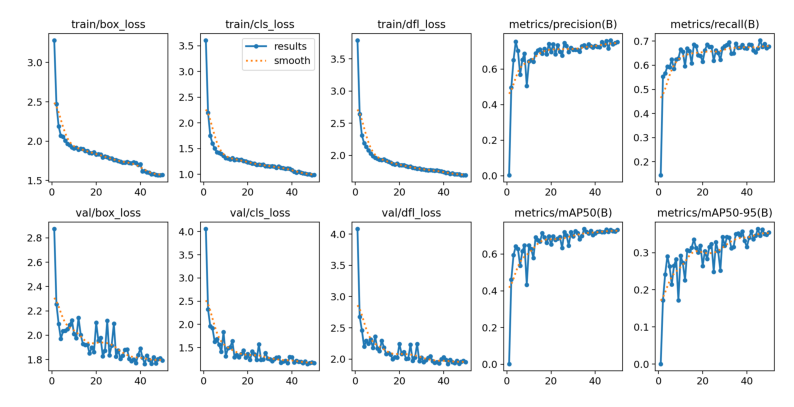

In [18]:
img = Image.open('/content/runs/detect/train/results.png')
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()